In [1]:
# Importing Libraries(Technologies)
from math import sqrt
from pandas_datareader import data 
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import datetime as dt
from datetime import date
import urllib.request,json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#import sweetviz
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
!pip install sweetviz

In [36]:
!pip install category_encoders

     |████████████████████████████████| 81kB 2.2MB/s 


# Data loading

In [7]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-pet-adoption/pet-adoption-9-5838c75b/a01c26dcd27711ea.zip

--2020-08-23 07:45:18--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-pet-adoption/pet-adoption-9-5838c75b/a01c26dcd27711ea.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.128.112
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.128.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 534157 (522K) [application/zip]
Saving to: ‘a01c26dcd27711ea.zip’

a01c26dcd27711ea.zi 100%[===================>] 521.64K   467KB/s    in 1.1s    

2020-08-23 07:45:20 (467 KB/s) - ‘a01c26dcd27711ea.zip’ saved [534157/534157]



In [8]:
!unzip a01c26dcd27711ea.zip

Archive:  a01c26dcd27711ea.zip
   creating: Dataset/
  inflating: Dataset/train.csv       
  inflating: Dataset/test.csv        


In [9]:
df=pd.read_csv('Dataset/train.csv')
dtest=pd.read_csv('Dataset/test.csv')

In [ ]:
df.shape,dtest.shape

((18834, 23), (8072, 20))

In [ ]:
df.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,a,condition*area,condition_color,conditionasperage,conditionasperx2-x1,X1X2,transport_timedays,not_bought_days,conditonX1,imonth,iyear,lmonth,lyear,condition_color_targets,r
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,4,0.124480,2.0_Brown Tabby,0.2,0.400000,130,73.684028,1415.717192,15.0,7,2016,9,2016,0.500204,18.0
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,4,0.102168,1.0_White,0.1,0.200000,130,1862.740972,588.660248,14.0,11,2013,12,2018,0.000629,9.0
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,0.0,Brown,0.15,40.90,15,4,2.0,4,11,0.000000,0.0_Brown,0.0,0.000000,75,752.350000,1388.051220,15.0,9,2014,10,2016,1.489343,0.0
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,1,0.110484,1.0_White,0.5,0.500000,0,755.770833,559.630386,1.0,12,2016,1,2019,0.000629,1.0
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,14,0.110600,2.0_Black,0.4,0.133333,90,52.401389,991.999831,20.0,9,2017,11,2017,0.448753,8.0


In [ ]:
dtest.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [ ]:
df.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category,area,a,condition*area,conditionasperage,conditionasperX1,conditionasperx2-x1,X1/a
count,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.814113,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143,0.137800,4.323670,0.110972,0.196353,0.434564,0.203194,0.852666
std,0.776801,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919,0.109404,3.237406,0.161659,0.230842,0.602101,0.228235,1.088061
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000,0.049447,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000,0.109425,4.000000,0.035933,0.125000,0.111111,0.125000,0.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000,0.204836,7.000000,0.168360,0.400000,1.000000,0.400000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000,0.497800,15.000000,0.961488,2.000000,2.000000,2.000000,4.000000


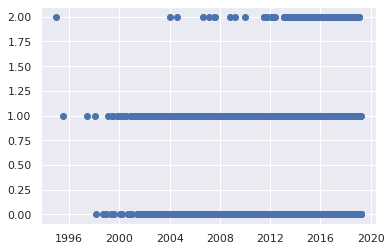

In [ ]:
plt.scatter(df['issue_date'],df['breed_category'])

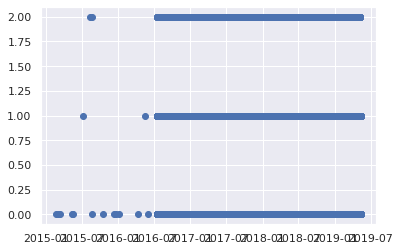

In [ ]:
plt.scatter(df['listing_date'],df['breed_category'])

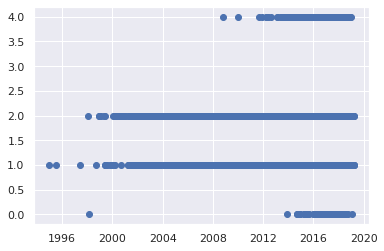

In [ ]:
plt.scatter(df['issue_date'],df['pet_category'])

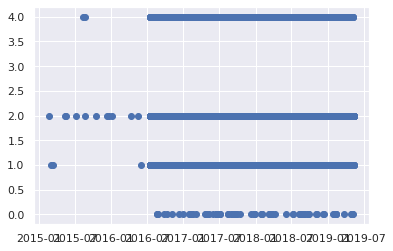

In [ ]:
plt.scatter(df['listing_date'],df['pet_category'])

In [111]:
df=pd.read_csv('Dataset/train.csv')
dtest=pd.read_csv('Dataset/test.csv')

# Data Cleaning and preprocessing

In [12]:
dtest['length(m)'].describe()

count    8072.000000
mean        0.507265
std         0.289615
min         0.000000
25%         0.260000
50%         0.510000
75%         0.760000
max         1.000000
Name: length(m), dtype: float64

In [113]:
df['condition']=df['condition'].fillna(-1.0)
dtest['condition']=dtest['condition'].fillna(-1.0)
l=pd.concat([df['length(m)'],dtest['length(m)']],axis=0)
tr_rows=len(df['length(m)'])
x=lth[lth!=0].mean()
s=(lth==0)
s=s[s==True]
l.loc[s.index]=x
df['length(m)']=l[:tr_rows]
dtest['length(m)']=l[tr_rows:]


# EDA and Feature Generation

In [ ]:
my_report = sweetviz.analyze([df, "Test"])
my_report.show_html('Report.html')

In [114]:
df['a']=abs(df['X1']-df['X2'])
dtest['a']=abs(dtest['X1']-dtest['X2'])

df['condition*area']=df['condition']*df['length(m)']*df['height(cm)']/100
dtest['condition*area']=dtest['condition']*dtest['length(m)']*dtest['height(cm)']/100

df['condition_color']=df['condition'].astype('str')+'_'+df['color_type']
dtest['condition_color']=dtest['condition'].astype('str')+'_'+dtest['color_type']

df['r']=df['listing_date'].astype('str')
dtest['r']=dtest['listing_date'].astype('str')

#df['p']=df['issue_date'].astype('str')
#dtest['p']=dtest['issue_date'].astype('str')


df['r']=df['listing_date'].astype('str')
dtest['r']=dtest['condition'].astype('str')

df['conditionasperage']=df['condition']/(df['X2']+1)
dtest['conditionasperage']=dtest['condition']/(dtest['X2']+1)

#df['conditionasperX1']=df['condition']/(df['X1']+1)
#dtest['conditionasperX1']=dtest['condition']/(dtest['X1']+1)

df['conditionasperx2-x1']=abs(df['condition']/(abs(df['X1']-df['X2'])+1))
dtest['conditionasperx2-x1']=abs(dtest['condition']/(abs(df['X1']-df['X2'])+1))

#df['X1/a']=df['X1']/(df['a']+1)
#dtest['X1/a']=dtest['X1']/(dtest['a']+1)

df['X1X2']=df['X1']*(df['X2']+1)
dtest['X1X2']=dtest['X1']*(dtest['X2']+1)

df['issue_date']=pd.to_datetime(df['issue_date'])
df['listing_date']=pd.to_datetime(df['listing_date'])
dtest['issue_date']=pd.to_datetime(dtest['issue_date'])
dtest['listing_date']=pd.to_datetime(dtest['listing_date'])

df['transport_timedays']=abs(df['listing_date']-df['issue_date'])
df['transport_timedays']=df['transport_timedays']/np.timedelta64(1,'D')
dtest['transport_timedays']=abs(dtest['listing_date']-dtest['issue_date'])
dtest['transport_timedays']=dtest['transport_timedays']/np.timedelta64(1,'D')

import datetime
d=datetime.datetime.now()
print(type(d))
d=pd.to_datetime(d)

df['not_bought_days']=abs(d-df['listing_date'])
df['not_bought_days']=df['not_bought_days']/np.timedelta64(1,'D')
dtest['not_bought_days']=abs(d-dtest['issue_date'])
dtest['not_bought_days']=dtest['not_bought_days']/np.timedelta64(1,'D')

df['conditonX1']=df['condition']+df['X1']
dtest['conditonX1']=dtest['condition']+dtest['X1']

#ignore
df['imonth']=df['issue_date'].dt.month
#df['iday']=df['issue_date'].dt.day
df['iyear']=df['issue_date'].dt.year
#df['iweekday']=df['issue_date'].dt.weekday
dtest['imonth']=dtest['issue_date'].dt.month
#dtest['iday']=dtest['issue_date'].dt.day
dtest['iyear']=dtest['issue_date'].dt.year
#dtest['iweekday']=dtest['issue_date'].dt.weekday


#ignore

df['lmonth']=df['listing_date'].dt.month
#df['lday']=df['listing_date'].dt.day
df['lyear']=df['listing_date'].dt.year
#df['lweekday']=df['listing_date'].dt.weekday
dtest['lmonth']=dtest['listing_date'].dt.month
#dtest['lday']=dtest['listing_date'].dt.day
dtest['lyear']=dtest['listing_date'].dt.year
#dtest['lweekday']=dtest['listing_date'].dt.weekday

<class 'datetime.datetime'>


In [115]:
s=list(df['color_type'].value_counts()[df['color_type'].value_counts()<100].index)
df['color_type'][df['color_type'].isin(s)]='None'
dtest['color_type'][dtest['color_type'].isin(s)]='None'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
x=pd.get_dummies(df['color_type'],drop_first=True)
xt=pd.get_dummies(dtest['color_type'],drop_first=True)
x1=pd.get_dummies(df['condition'],drop_first=True)
x1t=pd.get_dummies(dtest['condition'],drop_first=True)
df.drop('condition',axis=1,inplace=True)
dtest.drop('condition',axis=1,inplace=True)

In [117]:
import category_encoders as ce
cat_features = ['condition_color','r']
target_enc = ce.CatBoostEncoder(cols=cat_features)
target_enc.fit(df[cat_features], df['breed_category'])
# Transform the features, rename the columns with _target suffix, and join to dataframe
df = df.join(target_enc.transform(df[cat_features]).add_suffix('_targets'))
dtest = dtest.join(target_enc.transform(dtest[cat_features]).add_suffix('_targets'))

In [118]:
dframe=pd.concat([df,x,x1],axis=1)
dframetest=pd.concat([dtest,xt,x1t],axis=1)

In [119]:
abs(dframe.corr(method='pearson')['breed_category']).sort_values(ascending=False)

breed_category             1.000000
condition_color_targets    0.930844
1.0                        0.718305
conditionasperage          0.655138
condition*area             0.471888
conditionasperx2-x1        0.455809
0.0                        0.448581
r_targets                  0.304190
X1                         0.240729
pet_category               0.209230
a                          0.192401
X1X2                       0.165987
conditonX1                 0.146782
Brown                      0.107012
transport_timedays         0.102779
Gray                       0.101604
Tortie                     0.101488
2.0                        0.096860
Calico                     0.093936
iyear                      0.089558
Torbie                     0.082081
Orange Tabby               0.073143
X2                         0.052530
White                      0.049135
Tan                        0.047779
lyear                      0.034661
not_bought_days            0.031255
Cream Tabby                0

In [120]:
dframe=dframe.drop(['pet_id','color_type','condition_color','issue_date','listing_date','r'],axis=1)
dframetest=dframetest.drop(['pet_id','color_type','condition_color','issue_date','listing_date','r'],axis=1)
X=dframe.drop(['breed_category','pet_category'],axis=1)
y1=df['breed_category'].values
y2=df['pet_category'].values


In [ ]:
X.drop('r',axis=1,inplace=True)

In [121]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,f1_score
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=123)
xgbr1=xgb.XGBClassifier()
xgbr1.fit(X_train,y_train)
pred=xgbr1.predict(X_test)
f1_score(y_test,pred,average='weighted')

0.9187836356241385

In [122]:
import lightgbm as lgb
lgb1=lgb.LGBMClassifier()
lgb1.fit(X_train,y_train)
pred=lgb1.predict(X_test)
f1_score(y_test,pred,average='weighted')

0.9099607875180988

In [123]:
f1=xgbr1.predict(dframetest)

In [124]:
b=pd.get_dummies(df['breed_category'],prefix='breed')
bt=pd.get_dummies(f1,prefix='breed')

In [125]:
df2=pd.concat([X,b],axis=1)
df2test=pd.concat([dframetest,bt],axis=1)

In [126]:
df2=df2.drop(['condition_color_targets','r_targets'],axis=1)
df2test=df2test.drop(['condition_color_targets','r_targets'],axis=1)


In [127]:
import category_encoders as ce
cat_features = ['condition_color','r']
target_enc = ce.CatBoostEncoder(cols=cat_features)
target_enc.fit(df[cat_features], df['pet_category'])
# Transform the features, rename the columns with _target suffix, and join to dataframe
df2 = df2.join(target_enc.transform(df[cat_features]).add_suffix('_targets'))
df2test = df2test.join(target_enc.transform(dtest[cat_features]).add_suffix('_targets'))

In [129]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df2, y2, test_size=0.2, random_state=123)
xgbr2=xgb.XGBClassifier()
xgbr2.fit(X_train,y_train)
pred=xgbr2.predict(X_test)
f1_score(y_test,pred,average='weighted')

0.9166240420363203

In [130]:
f2=xgbr2.predict(df2test)

In [ ]:
df['X1/a'].describe()

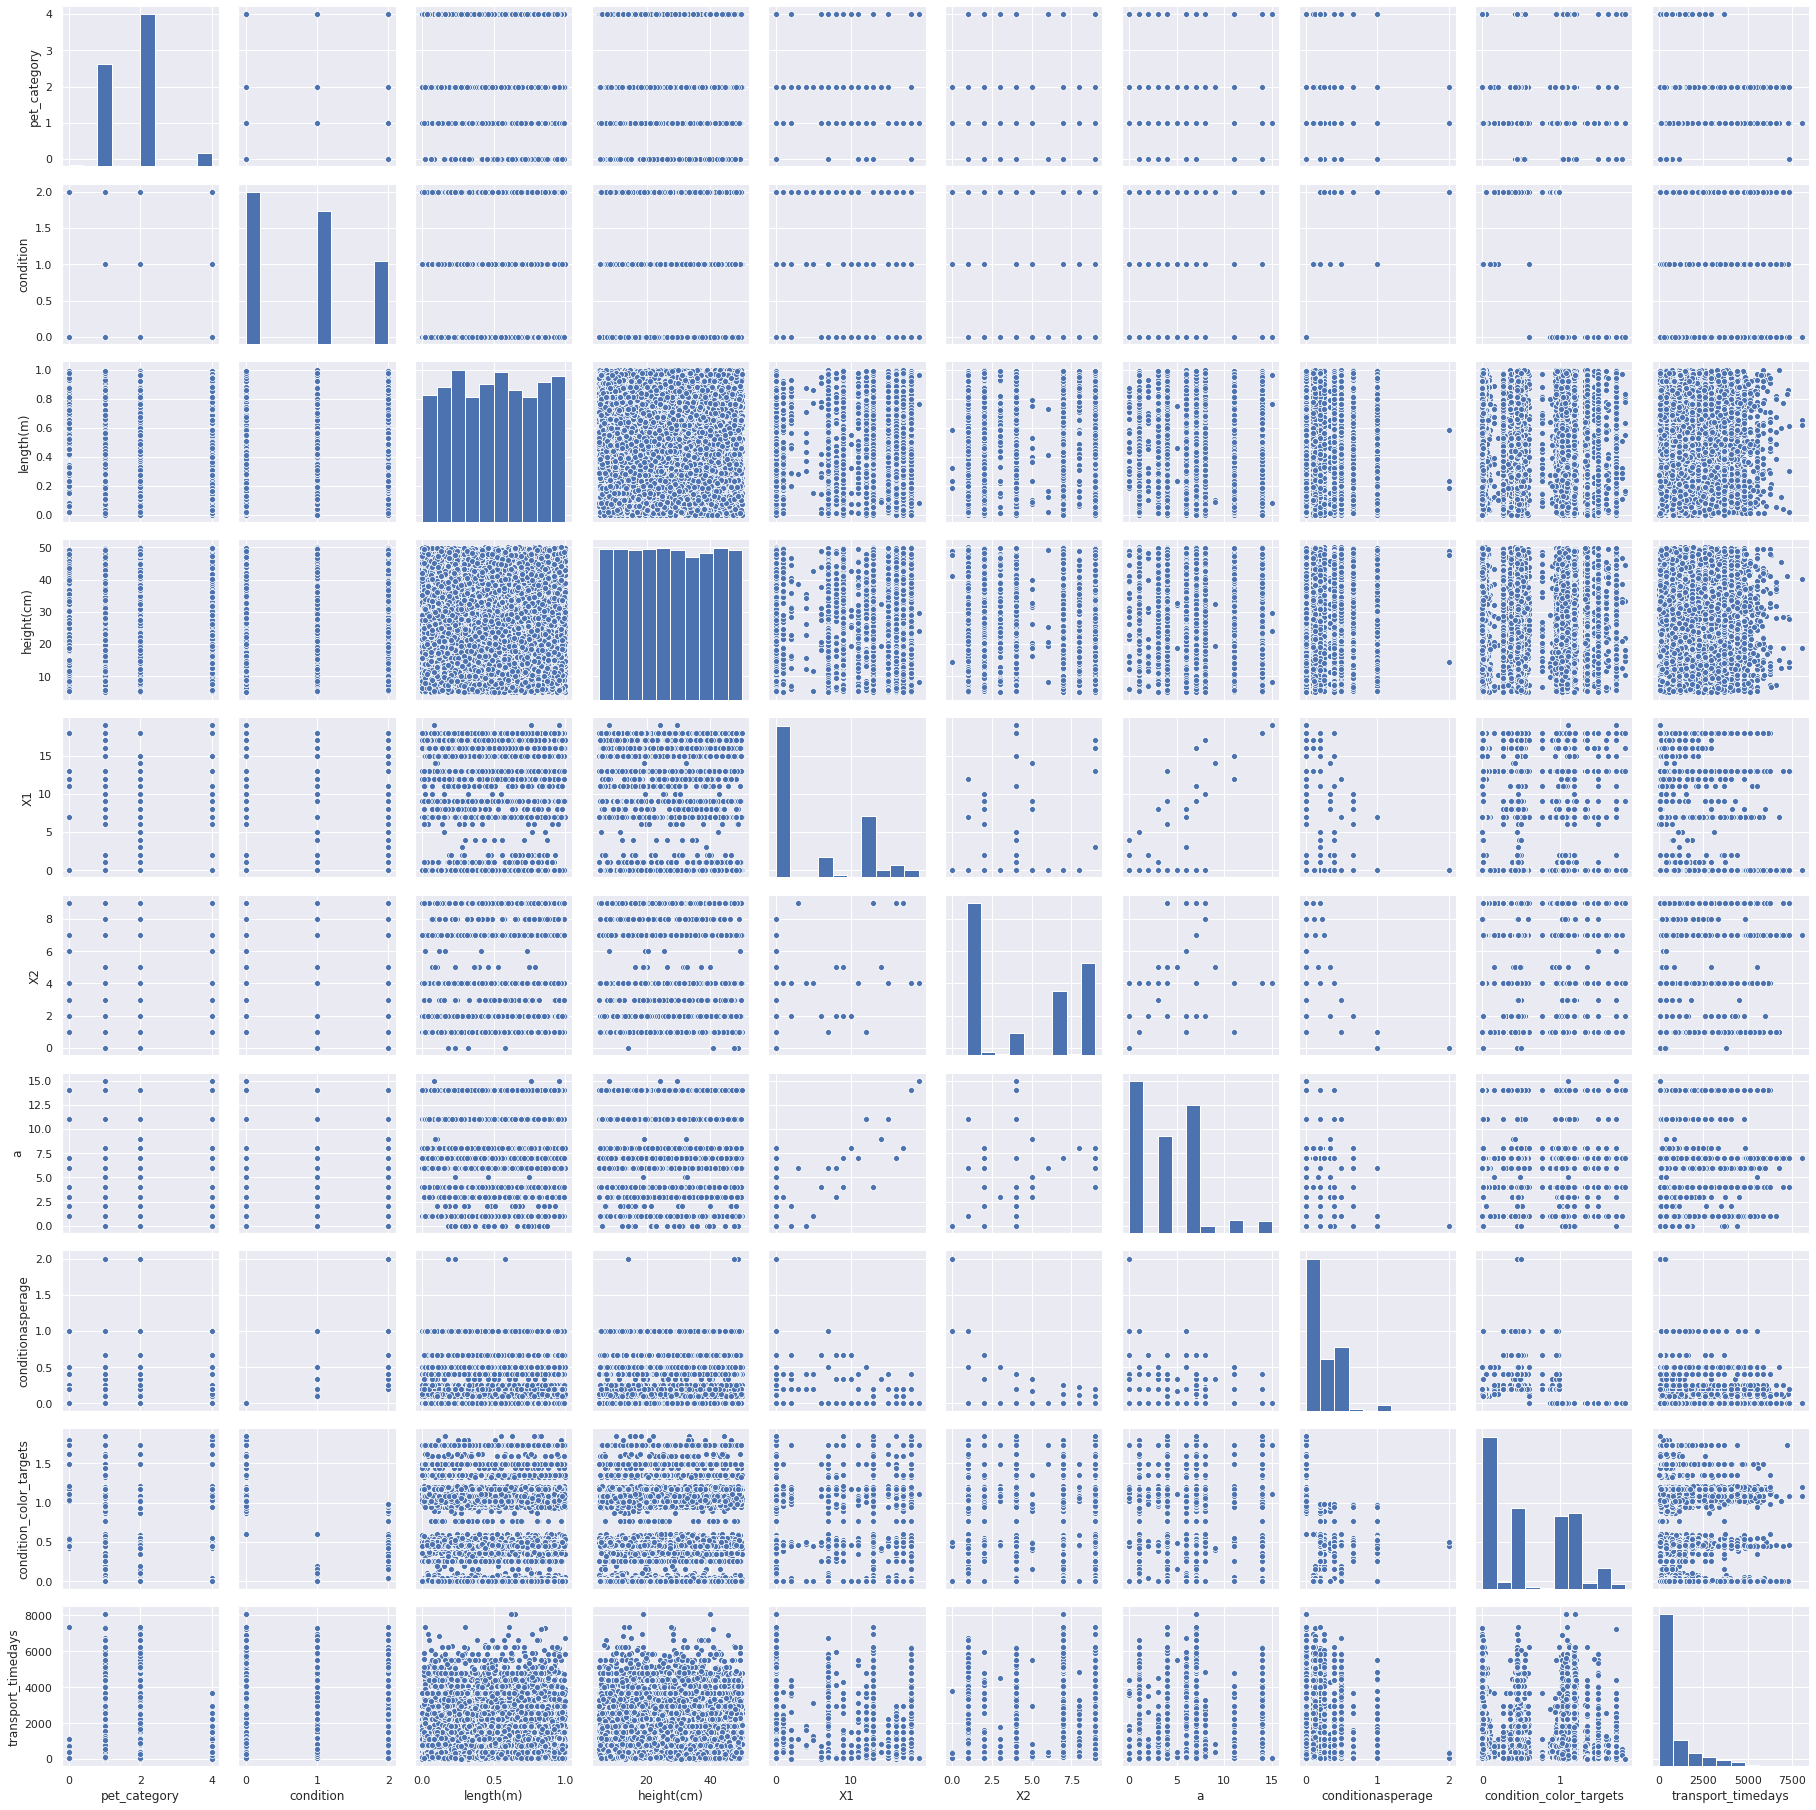

In [ ]:
#scatterplot
sns.set()
cols = ['pet_category','condition','length(m)','height(cm)','X1','X2','a','conditionasperage','condition_color_targets','transport_timedays']
sns.pairplot(df[cols], height = 2.5)
plt.show();

In [ ]:
dframe.select_dtypes('object')

,pet_id,color_type,condition_color
0,ANSL_69903,Brown Tabby,2.0_Brown Tabby
1,ANSL_66892,White,1.0_White
2,ANSL_69750,Brown,0.0_Brown
3,ANSL_71623,White,1.0_White
4,ANSL_57969,Black,2.0_Black
...,...,...,...
18829,ANSL_51738,Tricolor,2.0_Tricolor
18830,ANSL_59900,Brown,0.0_Brown
18831,ANSL_53210,None,0.0_Calico Point
18832,ANSL_63468,Tan,0.0_Tan


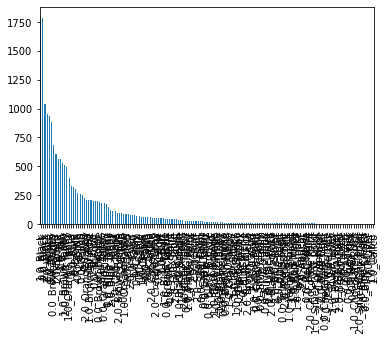

In [ ]:
df['condition_color'].value_counts().plot(kind='bar')

In [ ]:
dtest.info()

In [ ]:
df.nunique()

In [ ]:
df['breed_category'].unique(),df['pet_category'].unique()

In [ ]:
df=df[df['length(m)']!=0].copy()

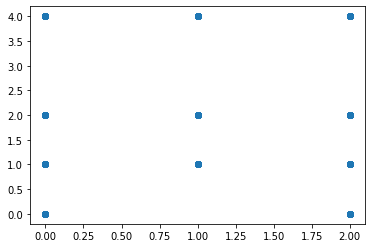

In [ ]:
plt.scatter(df['condition'],df['pet_category'])

In [ ]:
df['condition'].value_counts()

0.0    7758
1.0    6819
2.0    4257
Name: condition, dtype: int64

In [ ]:
X.describe()

In [ ]:
X.isnull().sum()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
skb1=SelectKBest(score_func=chi2,k=20)
X_clf_new1=skb1.fit_transform(X,y1)

In [97]:
# Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20] ,
 "max_depth"        : [ 3,4,5,6,8,10,13,15],
 "min_child_weight" : [  3,5, 6,9 ,11,14,19],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ,0.5],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7,0.9 ],
 "num_boost_round": [10, 25, 50,80,100,150],
  "n_estimators" :[50,100,200,300,500] 
}

In [98]:
xg_reg = xgb.XGBClassifier()

In [99]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [100]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_search=RandomizedSearchCV(xg_reg,param_distributions=params,n_iter=5,n_jobs=1,cv=4,verbose=3)

In [101]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV] num_boost_round=10, n_estimators=50, min_child_weight=19, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  num_boost_round=10, n_estimators=50, min_child_weight=19, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5, score=0.915, total=   3.1s
[CV] num_boost_round=10, n_estimators=50, min_child_weight=19, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  num_boost_round=10, n_estimators=50, min_child_weight=19, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5, score=0.912, total=   3.1s
[CV] num_boost_round=10, n_estimators=50, min_child_weight=19, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV]  num_boost_round=10, n_estimators=50, min_child_weight=19, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5, score=0.916, total=   3.1s
[CV] num_boost_round=10, n_estimators=50, min_child_weight=19, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5 
[CV]  num_boost_round=10, n_estimators=50, min_child_weight=19, max_depth=15, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5, score=0.919, total=   3.1s
[CV] num_boost_round=150, n_estimators=100, min_child_weight=11, max_depth=3, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5 
[CV]  num_boost_round=150, n_estimators=100, min_child_weight=11, max_depth=3, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5, score=0.912, total=   2.4s
[CV] num_boost_round=150, n_estimators=100, min_child_weight=11, max_depth=3, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5 
[CV]  num_boost_round=150, n_estimators=100, min_child_weight=11, max_depth=3, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5, s

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.3min finished



 Time taken: 0 hours 4 minutes and 22.4 seconds.


In [102]:
random_search.best_score_

0.9155109687913641

In [103]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=19, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, num_boost_round=10, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [105]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=123)
xgbr1=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=19, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, num_boost_round=10, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)
xgbr1.fit(X_train,y_train)
pred=xgbr1.predict(X_test)
f1_score(y_test,pred,average='weighted')

0.9157604570790604

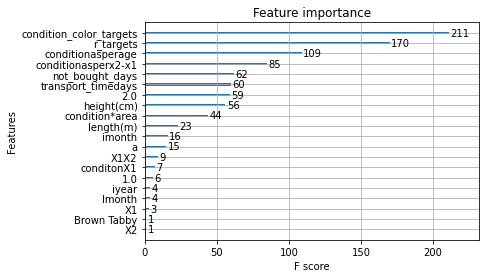

In [85]:
from xgboost import plot_importance
plot_importance(xgbr1)

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators=101)
clf.fit(X_train, y_train)
y_pred_lgbm = clf.predict(X_test)

print('accuracy_score:', accuracy_score(y_test,y_pred_lgbm))

accuracy_score: 0.9137244491637908


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10,shuffle=True, random_state=7)
results = cross_val_score(xgbr1, X_clf_new1, y1, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
skb2=SelectKBest(score_func=chi2,k=30)
X_clf_new2=skb2.fit_transform(X,y2)

In [ ]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=123)
xgbr2=xgb.XGBClassifier()
xgbr2.fit(X_train2,y_train2)
pred=xgbr2.predict(X_test2)
accuracy_score(y_test2,pred)

0.8914255375630475

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10,shuffle=True, random_state=7)
results = cross_val_score(xgbr2, X, y2, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 88.26% (0.82%)


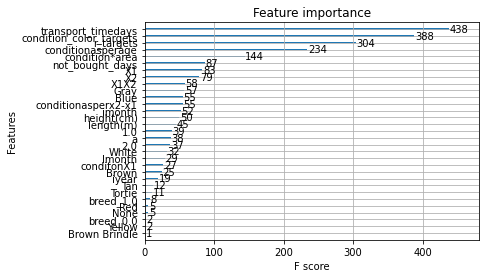

In [84]:
from xgboost import plot_importance
plot_importance(xgbr2)

In [ ]:
dframetest.head()

,condition,length(m),height(cm),X1,X2,a,condition*area,conditionasperage,conditionasperX1,conditionasperx2-x1,area,iyear,transport_timedays,not_bought_days,condition_color_targets,Blue,Blue Merle,Blue Tabby,Brown,Brown Brindle,Brown Tabby,Buff,Calico,Chocolate,Cream,Cream Tabby,Fawn,Gray,Lynx Point,None,Orange Tabby,Red,Sable,Tan,Torbie,Tortie,Tricolor,White,Yellow,1.0,2.0
0,0.0,0.87,42.73,0,7,7,0.000000,0.000,0.000,0.000000,0.371751,2005,4404.649306,5468.687737,0.999727,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.06,6.71,0,1,1,0.004026,0.500,1.000,0.200000,0.004026,2018,174.725000,630.687737,0.001487,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,1.0,0.24,41.21,0,7,7,0.098904,0.125,1.000,0.083333,0.098904,2012,1999.702083,2856.687737,0.000335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.0,0.29,8.46,7,1,6,0.024534,0.500,0.125,0.500000,0.024534,2015,1148.309028,2001.687737,0.000335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1.0,0.71,30.92,0,7,7,0.219532,0.125,1.000,0.066667,0.219532,2017,463.570833,1296.687737,0.000988,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X.head()

,condition,length(m),height(cm),X1,X2,a,condition*area,conditionasperage,conditionasperX1,conditionasperx2-x1,X1X2,area,iyear,transport_timedays,not_bought_days,condition_color_targets,Blue,Blue Merle,Blue Tabby,Brown,Brown Brindle,Brown Tabby,Buff,Calico,Chocolate,Cream,Cream Tabby,Fawn,Gray,Lynx Point,None,Orange Tabby,Red,Sable,Tan,Torbie,Tortie,Tricolor,White,Yellow,1.0,2.0
0,2.0,0.80,7.78,13,9,4,0.124480,0.2,0.142857,0.400000,22,0.062240,2016,73.684028,1488.687737,0.500204,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,0.72,14.19,13,9,4,0.102168,0.1,0.071429,0.200000,22,0.102168,2013,1862.740972,2450.687737,0.000629,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0.0,0.15,40.90,15,4,11,0.000000,0.0,0.000000,0.000000,19,0.061350,2014,752.350000,2139.687737,1.996768,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0.62,17.82,0,1,1,0.110484,0.5,1.000000,0.500000,1,0.110484,2016,755.770833,1314.687737,0.000629,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,2.0,0.50,11.06,18,4,14,0.110600,0.4,0.105263,0.133333,22,0.055300,2017,52.401389,1043.687737,0.448753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
dframetest['X1X2']=dtest['X1']*dtest['X2']

In [ ]:
X['X1X2']

0        22
1        22
2        19
3         1
4        22
         ..
18829     1
18830    19
18831    22
18832    22
18833     1
Name: X1X2, Length: 18834, dtype: int64

In [ ]:
list(X.columns),list(dframetest.columns)

(['length(m)',
  'height(cm)',
  'X1',
  'X2',
  'a',
  'condition*area',
  'conditionasperage',
  'conditionasperx2-x1',
  'X1X2',
  'transport_timedays',
  'not_bought_days',
  'conditonX1',
  'imonth',
  'iyear',
  'lmonth',
  'lyear',
  'condition_color_targets',
  'r_targets',
  'Blue',
  'Blue Merle',
  'Blue Tabby',
  'Brown',
  'Brown Brindle',
  'Brown Tabby',
  'Buff',
  'Calico',
  'Chocolate',
  'Cream',
  'Cream Tabby',
  'Fawn',
  'Gray',
  'Lynx Point',
  'None',
  'Orange Tabby',
  'Red',
  'Sable',
  'Tan',
  'Torbie',
  'Tortie',
  'Tricolor',
  'White',
  'Yellow',
  1.0,
  2.0],
 ['condition',
  'length(m)',
  'height(cm)',
  'X1',
  'X2',
  'a',
  'condition*area',
  'conditionasperage',
  'conditionasperx2-x1',
  'X1X2',
  'transport_timedays',
  'not_bought_days',
  'conditonX1',
  'imonth',
  'iyear',
  'lmonth',
  'lyear',
  'condition_color_targets',
  'r_targets',
  'Blue',
  'Blue Merle',
  'Blue Tabby',
  'Brown',
  'Brown Brindle',
  'Brown Tabby',
  'Buff

In [ ]:
dframetest.drop('condition',axis=1,inplace=True)

In [ ]:
dframetest1=skb1.transform(dframetest)
dframetest2=skb2.transform(dframetest)

In [ ]:
d=dframetest.drop('X1X2',axis=1)

In [ ]:
X.shape,dframetest.shape

((18834, 44), (8072, 45))

In [ ]:
f1=xgbr1.predict(dframetest)
f2=xgbr2.predict(dframetest)

In [131]:
sub=pd.DataFrame({
    "pet_id":dtest['pet_id'],
    "breed_category":f1,
    "pet_category":f2
})
sub.to_csv('sub_xgb_newfeatures.csv',index=False)

In [ ]:
sub.shape

(8072, 3)